In [ ]:
# This file contains exploratory data analysis of the Virginia Dataset, as well as some preliminary ARIMA modeling

import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima

In [4]:
# Load data
df = pd.read_csv("final_ndbc_data.csv")

# Add in date index
start = '2015-01-01 00:00'
periods = len(df)
datetime_index = pd.date_range(start=start, periods=periods, freq='H')
df.index = datetime_index

## Exploratory Data Analysis

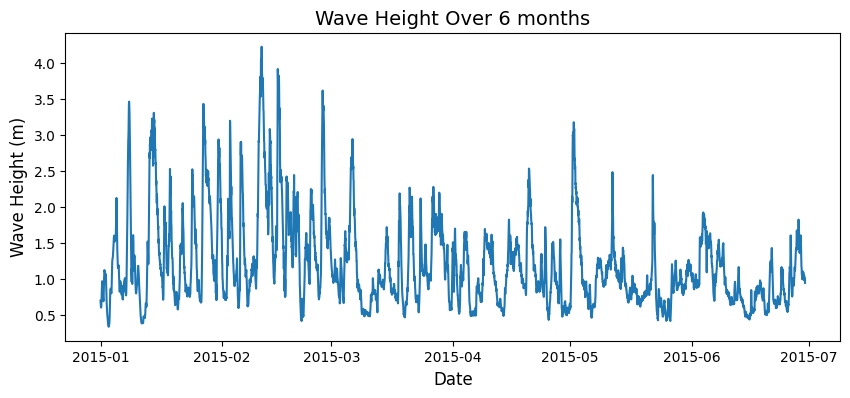

In [8]:
# Time Series Plot
plt.figure(figsize=(10,4))
plt.plot(df['WVHT'][:pd.to_datetime('2015-06-30')])
plt.title('Wave Height Over 6 months', fontsize=14)
plt.ylabel('Wave Height (m)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.show()


In [ ]:
# Summary Statistics
df['WVHT'].describe()

count    17544.000000
mean         1.228615
std          0.632349
min          0.300000
25%          0.800000
50%          1.050000
75%          1.495000
max          5.795000
Name: WVHT, dtype: float64

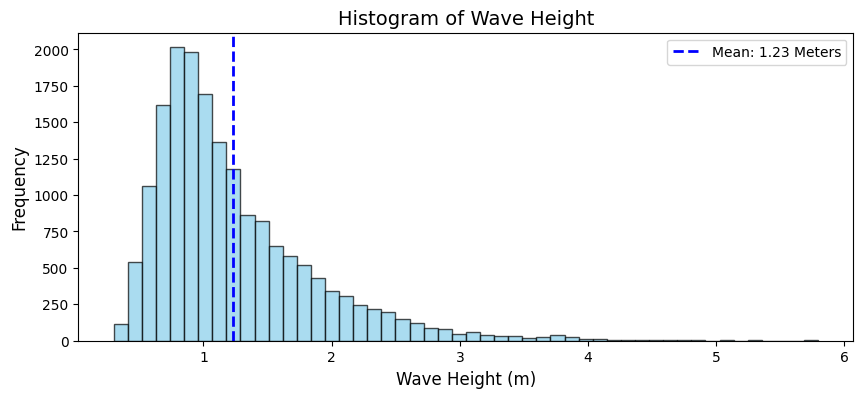

In [10]:
# Histogram

# Calculate the mean
mean_wvht = df['WVHT'].mean()

# Plot histogram
plt.figure(figsize=(10, 4))
plt.hist(df['WVHT'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_wvht, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_wvht:.2f} Meters')
plt.title('Histogram of Wave Height', fontsize=14)
plt.xlabel('Wave Height (m)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

# plt.tight_layout()
plt.show()


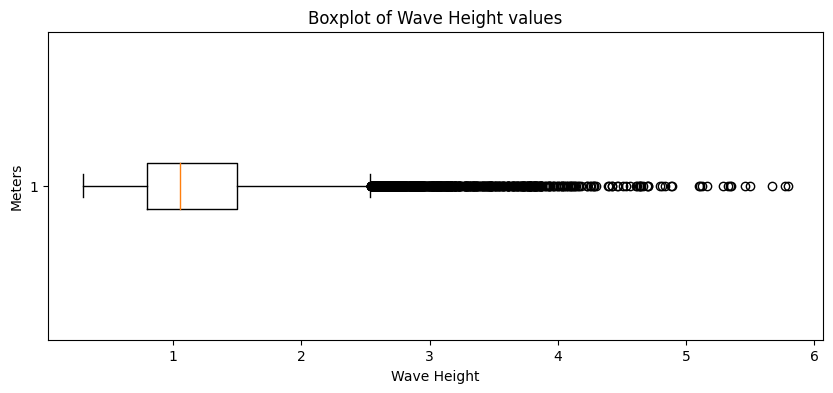

In [11]:
# Boxplot
plt.figure(figsize = (10,4))
plt.boxplot(df['WVHT'], vert=False)
plt.title('Boxplot of Wave Height values')
plt.xlabel('Wave Height')
plt.ylabel('Meters')
plt.show()

## Time Series Analysis

### ACF and PACF Plot

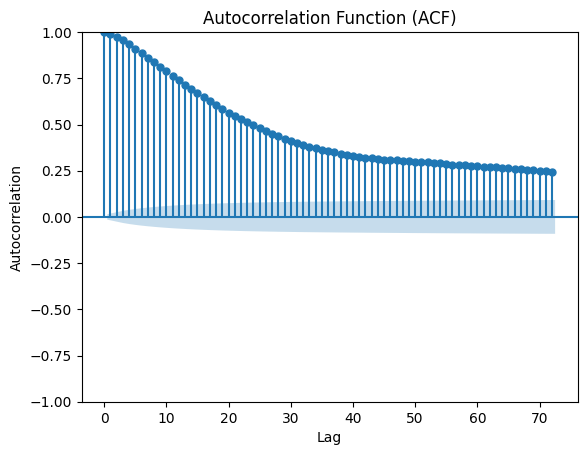

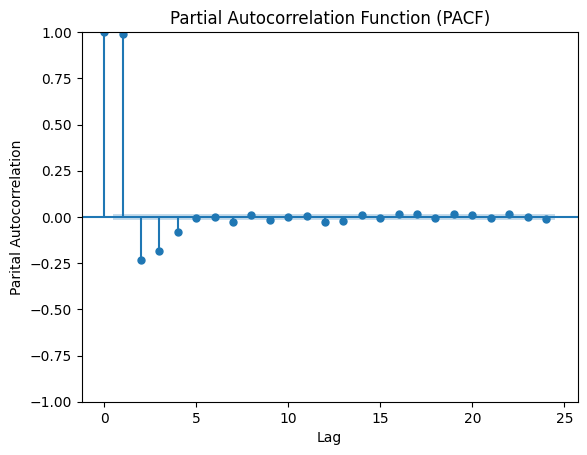

In [ ]:
# Looking for hourly Seasonality

# Create ACF plot
y=df['WVHT']
plot_acf(y, lags=24*3, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create PACF plot
plot_pacf(y, lags=24*1, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Parital Autocorrelation')
plt.show()

### Grouped Plots

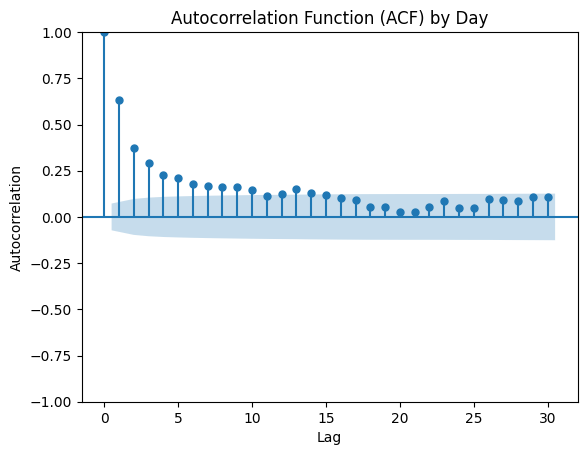

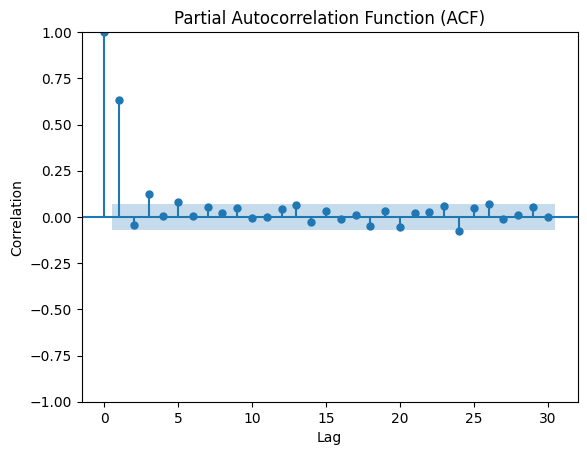

In [ ]:
# Grouping by day 
y_grouped= y.groupby(pd.Grouper(freq='D')).mean()

# Create ACF plot
plot_acf(y_grouped, lags=30, alpha=0.05)

plt.title('Autocorrelation Function (ACF) by Day')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create PACF plot
plot_pacf(y_grouped, lags=30, alpha=0.05)

plt.title('Partial Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()



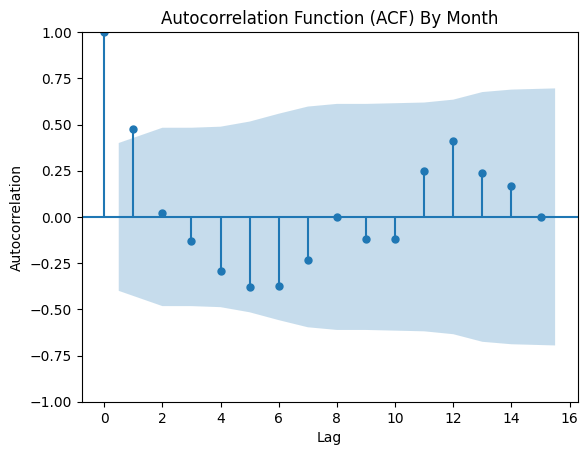

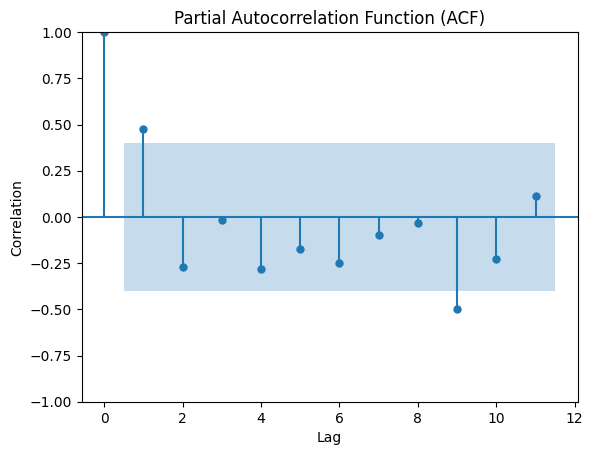

In [ ]:
# Grouping by Month
y_grouped = y.groupby(pd.Grouper(freq='M')).mean()

# Create ACF plot
plot_acf(y_grouped, lags=15, alpha=0.05)

plt.title('Autocorrelation Function (ACF) By Month')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Create PACF plot
plot_pacf(y_grouped, lags=11, alpha=0.05)

plt.title('Partial Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

### Decompostion

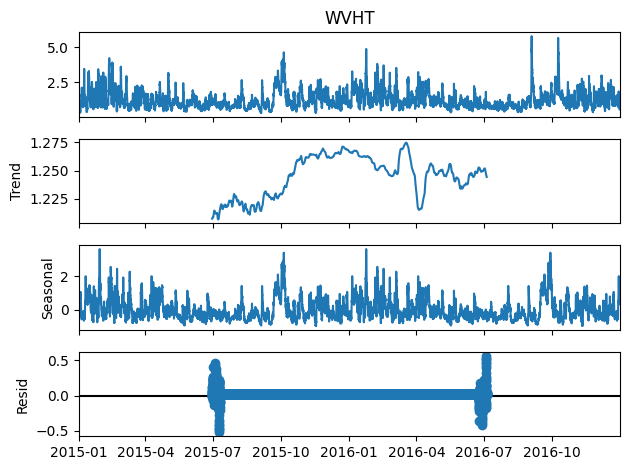

In [ ]:
# Decomposition
decomposition = seasonal_decompose(y, model='additive', period=12*30*24)
trend = decomposition.trend

# Plot
decomposition.plot()
plt.show()


## ARIMA

In [44]:
auto_X = df['WVHT'][0:5000]

auto_model = auto_arima(auto_X, 
                seasonal=True, 
                d=0,  # Force no differencing
                max_p=5, max_q=5, 
                stepwise=True, 
                trace=True)

C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-10885.084, Time=2.38 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9056.209, Time=0.23 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-10037.242, Time=0.22 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3008.773, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16887.623, Time=0.03 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-10731.202, Time=1.58 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-10882.786, Time=2.15 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-10893.470, Time=3.17 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-10878.973, Time=2.56 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-10891.648, Time=3.43 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-10892.936, Time=3.29 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-10881.491, Time=3.09 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-10878.250, Time=3.15 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-10891.189, Time=4.86 sec


C:\Users\tarun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-10813.743, Time=1.19 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 31.698 seconds


In [51]:
import statsmodels.api as sm

future_steps = 12
X=df['WVHT'].iloc[0:3000]   # smaller sample for runtime- this takes ~30s. Did not see improvement with more samples.
size = int(len(X) * 0.8)
# size = int(len(X)-future_steps)
y_train_sar, y_test_sar = X.iloc[0:size], X.iloc[size:len(X)]


# Fit the SARIMAX model
model = sm.tsa.SARIMAX(y_train_sar,
                    order=(3, 0, 2),  # (p, d, q)
                    seasonal_order=(1, 1, 1, 24),  # (P, D, Q, s)
                    enforce_stationarity=False,
                    enforce_invertibility=False)
results = model.fit(disp=2)

# Print summary of the model
print(results.summary())
print(size)

                                      SARIMAX Results                                       
Dep. Variable:                                 WVHT   No. Observations:                 2400
Model:             SARIMAX(3, 0, 2)x(1, 1, [1], 24)   Log Likelihood                2068.036
Date:                              Sat, 03 May 2025   AIC                          -4120.072
Time:                                      19:52:54   BIC                          -4073.978
Sample:                                  01-01-2015   HQIC                         -4103.284
                                       - 04-10-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0844      0.179      6.042      0.000       0.733       1.436
ar.L2          0.45

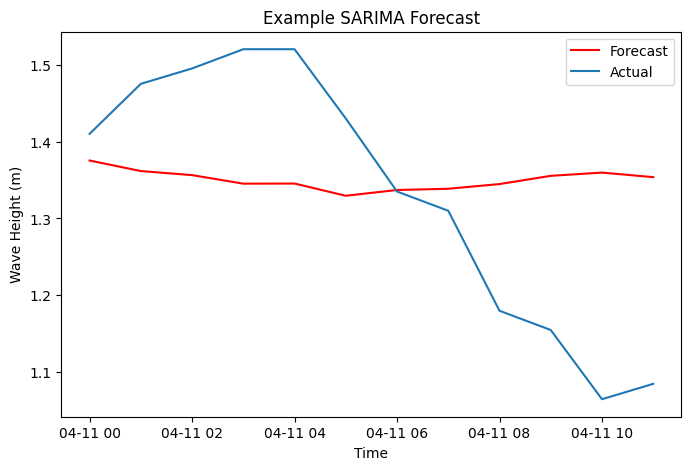

In [47]:
# Example Forecast

forecast = results.get_forecast(steps=future_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(8, 5))
plt.plot(forecast_mean, label='Forecast', color='red')
plt.plot(y_test_sar[:future_steps], label='Actual')

# plt.fill_between(forecast_ci.index,
#                 forecast_ci.iloc[:, 0],
#                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Example SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Wave Height (m)')
plt.legend()
plt.show()